In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as st
import warnings
warnings.filterwarnings(action = 'ignore')
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
import statsmodels.api as sm

In [59]:
df = pd.read_csv("fifa_stats.csv")
df.head(30)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154
5,E. Hazard,27,Belgium,91,91,Chelsea,Right,4,4,4,High/ Medium,LF,10,5.666667,163
6,L. ModriÄ‡,32,Croatia,91,91,Real Madrid,Right,4,4,4,High/ High,RCM,10,5.666667,146
7,L. SuÃ¡rez,31,Uruguay,91,91,FC Barcelona,Right,5,4,3,High/ Medium,RS,9,6.000000,190
8,Sergio Ramos,32,Spain,91,91,Real Madrid,Right,4,3,3,High/ Medium,RCB,15,6.000000,181
9,J. Oblak,25,Slovenia,90,93,AtlÃ©tico Madrid,Right,3,3,1,Medium/ Medium,GK,1,6.166667,192


In [60]:
df.shape

(2000, 15)

### Performing basic EDA operations

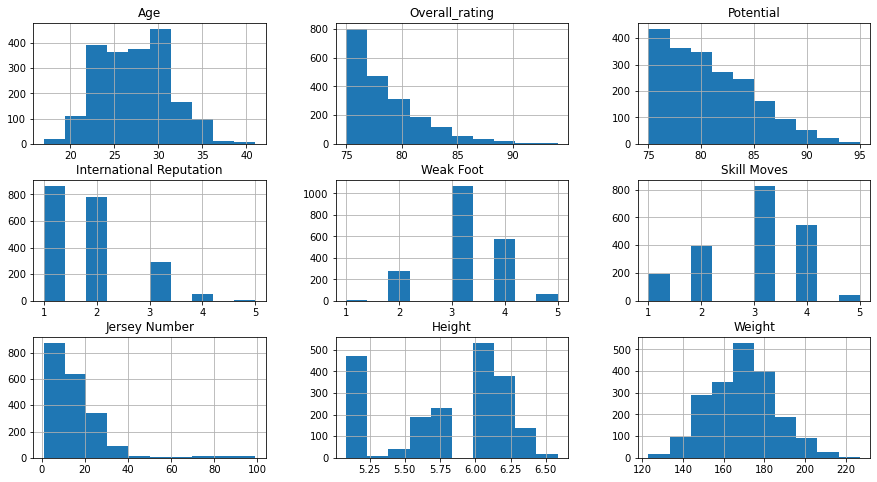

In [61]:
#univariate analysis : histogram will show the distribution of each feature
df.hist(figsize=(15,8));

In [62]:
#correlation analysis
df.corr()

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
Age,1.000000,0.063348,-0.511339,0.314808,-0.060940,-0.206624,-0.039370,0.065510,0.151674
Overall_rating,0.063348,1.000000,0.732695,0.661603,0.103579,0.081593,-0.094865,0.041815,0.055342
Potential,-0.511339,0.732695,1.000000,0.327717,0.099179,0.127366,-0.037827,0.030624,-0.017228
International Reputation,0.314808,0.661603,0.327717,1.000000,0.105748,0.088652,-0.032622,0.041700,0.071167
Weak Foot,-0.060940,0.103579,0.099179,0.105748,1.000000,0.342505,0.038840,-0.187942,-0.201137
Skill Moves,-0.206624,0.081593,0.127366,0.088652,0.342505,1.000000,0.065322,-0.472939,-0.528310
Jersey Number,-0.039370,-0.094865,-0.037827,-0.032622,0.038840,0.065322,1.000000,0.005081,-0.015377
Height,0.065510,0.041815,0.030624,0.041700,-0.187942,-0.472939,0.005081,1.000000,0.544016
Weight,0.151674,0.055342,-0.017228,0.071167,-0.201137,-0.528310,-0.015377,0.544016,1.000000


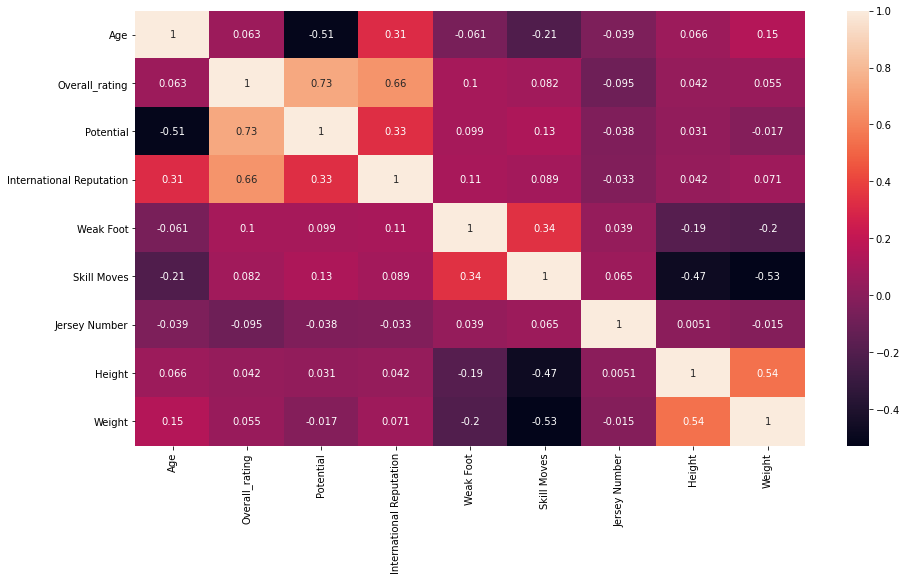

In [63]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot = True);

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

In [65]:
df.isnull().sum()

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

In [66]:
#Thus we infer that there are 19 null values in club column and let's drop them
na_data = df.isna()
na_data.head(2)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [67]:
df.isnull().values.any()

True

In [154]:
df = df[~ df.Club.isnull()].copy()
df.isnull().sum()

Name                        0
Age                         0
Nationality                 0
Overall_rating              0
Potential                   0
Club                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Position                    0
Jersey Number               0
Height                      0
Weight                      0
dtype: int64

### 1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information which includes height, weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed. 



#### a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

In [155]:
df.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [156]:
import random
sample_size = 200
no_of_samples = 100

sample_mean_list = []
for i in range(no_of_samples):
    sample_age = np.random.choice(list(df.Age),size = sample_size,replace = False)
    sample_mean = np.mean(sample_age)
    sample_mean_list.append(sample_mean)
    
sample_mean_list

[26.78,
 27.845,
 27.085,
 27.435,
 27.695,
 27.545,
 27.585,
 27.2,
 27.36,
 26.915,
 27.4,
 27.065,
 27.475,
 27.15,
 27.495,
 27.365,
 27.47,
 26.57,
 27.0,
 27.35,
 27.215,
 26.94,
 27.255,
 27.28,
 26.89,
 27.01,
 27.185,
 27.86,
 27.315,
 27.595,
 27.01,
 27.255,
 27.15,
 27.505,
 27.375,
 27.23,
 27.29,
 27.42,
 27.415,
 27.485,
 27.215,
 27.36,
 27.255,
 26.92,
 26.65,
 27.02,
 27.58,
 27.345,
 27.105,
 26.85,
 26.905,
 27.1,
 26.945,
 27.475,
 27.295,
 27.295,
 27.575,
 26.98,
 27.28,
 26.99,
 27.27,
 26.935,
 27.415,
 27.065,
 27.22,
 27.05,
 27.135,
 27.4,
 27.265,
 27.305,
 27.26,
 27.135,
 27.475,
 27.45,
 27.03,
 27.255,
 27.195,
 27.05,
 26.91,
 27.48,
 27.19,
 27.605,
 27.22,
 26.83,
 27.27,
 27.12,
 27.355,
 27.25,
 27.265,
 27.31,
 26.99,
 27.095,
 27.5,
 27.085,
 27.28,
 26.835,
 27.485,
 27.49,
 27.19,
 27.05]

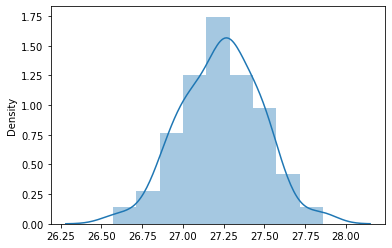

In [157]:
sns.distplot(sample_mean_list);

In [158]:
print(np.mean(list(df.Age)))
print(np.mean(sample_mean_list))

27.215547703180214
27.233199999999997


In [159]:
stats,pvalue = st.shapiro(sample_mean_list)
pvalue

0.8744961023330688

In [162]:
sigma_sample = np.std(sample_mean_list)
std_error = sigma_sample/np.sqrt(sample_size)

In [163]:
sigma_sample

0.24037420826702666

In [164]:
std_error

0.0169970232687962

#### b)	Is there any evidence that the players overall rating is greater than 80?

In [165]:
stats,pvalue  = st.shapiro(df['Overall_rating'])

In [166]:
round(pvalue)

0

In [167]:
z_critical = round(st.norm.isf(q = 0.95),2)
z_critical

-1.64

In [168]:
from statsmodels.stats import weightstats as stests
stests.ztest(x1 = df['Overall_rating'],value = 80,alternative= 'larger')

(-24.161970492711205, 1.0)

In [169]:
zcalc = -24.54
zcalc < z_critical

True

#### c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

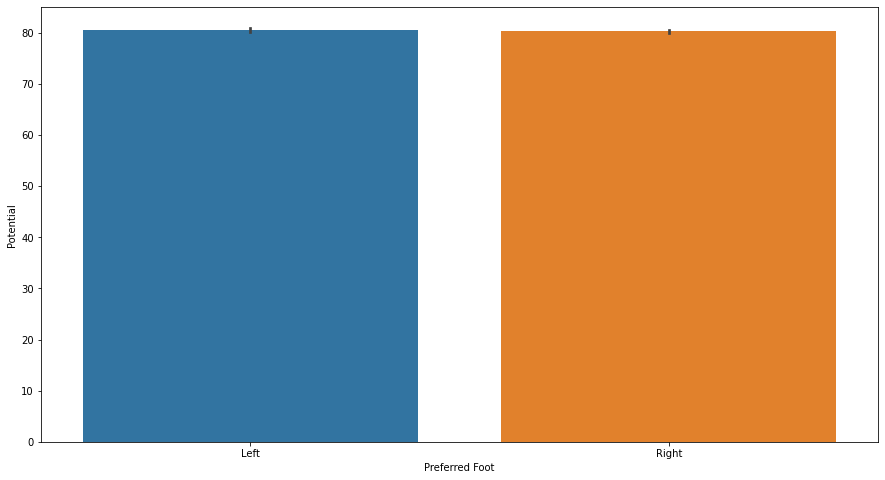

In [170]:
plt.figure(figsize= (15,8))
ax = sns.barplot(x= df['Preferred Foot'],y = df['Potential'])

In [171]:
df['Preferred Foot'].value_counts()

Right    1519
Left      462
Name: Preferred Foot, dtype: int64

In [172]:
st.shapiro([(df['Preferred Foot'] == 'Right'),df['Potential']])

ShapiroResult(statistic=0.6875892877578735, pvalue=0.0)

In [173]:
st.shapiro([(df['Preferred Foot'] == 'Left'),df['Potential']])

ShapiroResult(statistic=0.6861785650253296, pvalue=0.0)

In [174]:
from scipy.stats import spearmanr
#spearmanr test here is used to summarize thestrength between two data samples
spearmanr(df['Preferred Foot'],df['Potential'])

SpearmanrResult(correlation=-0.03019653362004952, pvalue=0.17912364256604602)

#### d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

In [175]:
stats,pvalue_rating = st.shapiro(df['Overall_rating'])
st.shapiro(df['Potential'])

ShapiroResult(statistic=0.9392035603523254, pvalue=9.272585199141702e-28)

In [176]:
round(pvalue_rating,2)

0.0

In [177]:
round(pvalue_potential)

0

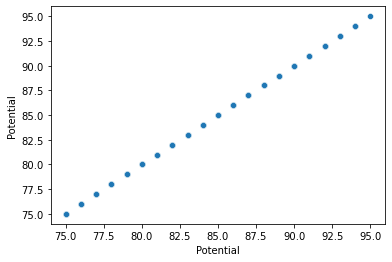

In [178]:
sns.scatterplot(df['Potential'],df['Potential']);

In [179]:
from scipy.stats import spearmanr
#spearmanr test here is used to summarize thestrength between two data samples
spearmanr(df['Potential'],df['Overall_rating'])

SpearmanrResult(correlation=0.6896762033137155, pvalue=9.4917983051747e-280)

#### e)	Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

In [180]:
df.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [181]:
df['Skill Moves'].value_counts()

3    818
4    540
2    392
1    192
5     39
Name: Skill Moves, dtype: int64

In [182]:
df['Overall_rating'].value_counts()

75    421
76    371
77    300
79    169
78    167
80    141
82     94
81     93
83     70
84     45
85     33
86     22
88     17
87     13
89     11
91      6
90      5
94      2
92      1
Name: Overall_rating, dtype: int64

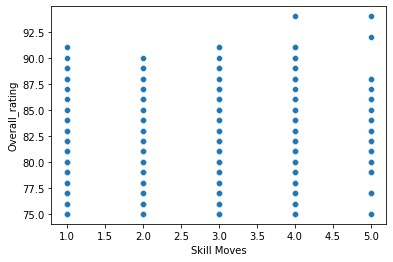

In [183]:
sns.scatterplot(df['Skill Moves'],df['Overall_rating']);

In [184]:
from scipy.stats import kruskal
kruskal(df['Skill Moves'],df['Overall_rating'])

KruskalResult(statistic=3016.303836680302, pvalue=0.0)

In [185]:
pvalue < 0.05

True

### Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, messages of various network. Data Cleaning and basic EDA process needs to be performed. 



In [141]:
dfmobnetwork = pd.read_csv("phone.csv")
dfmobnetwork.head(30)

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile
5,15-10-14 18:55,132.541300,call,2014-11,Tesco,mobile
6,16-10-14 6:58,166.883586,data,2014-11,data,data
7,16-10-14 15:01,184.997883,call,2014-11,Three,mobile
8,16-10-14 15:12,122.028417,call,2014-11,Three,mobile
9,16-10-14 15:30,106.321027,call,2014-11,voicemail,voicemail


In [142]:
dfmobnetwork.shape

(820, 6)

In [143]:
dfmobnetwork.describe()

,duration
count,820.000000
mean,144.304936
std,45.687777
min,0.993514
25%,112.916486
50%,144.179434
75%,175.932308
max,268.458090


In [147]:
dfmobnetwork.dtypes

date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

In [150]:
dfmobnetwork['Date'] = dfmobnetwork['date'].apply(lambda x : x.split(" ")[0])
dfmobnetwork['Time'] = dfmobnetwork['date'].apply(lambda x : x.split(" ")[1])
dfmobnetwork.drop('date',axis= 1,inplace= True)
dfmobnetwork.head()

,duration,item,month,network,network_type,Date,Time
0,221.321120,data,2014-11,data,data,15-10-14,6:58
1,81.610599,call,2014-11,Vodafone,mobile,15-10-14,6:58
2,143.109111,call,2014-11,Meteor,mobile,15-10-14,14:46
3,111.888670,call,2014-11,Tesco,mobile,15-10-14,14:48
4,246.695171,call,2014-11,Tesco,mobile,15-10-14,17:27


In [152]:
dfmobnetwork['Year'] = dfmobnetwork['month'].apply(lambda x : x.split("-")[0])
dfmobnetwork['Month'] = dfmobnetwork['month'].apply(lambda x : x.split("-")[1])
dfmobnetwork.drop('month',axis = 1, inplace= True)
dfmobnetwork.head()

,duration,item,network,network_type,Date,Time,Year,Month
0,221.321120,data,data,data,15-10-14,6:58,2014,11
1,81.610599,call,Vodafone,mobile,15-10-14,6:58,2014,11
2,143.109111,call,Meteor,mobile,15-10-14,14:46,2014,11
3,111.888670,call,Tesco,mobile,15-10-14,14:48,2014,11
4,246.695171,call,Tesco,mobile,15-10-14,17:27,2014,11


In [191]:
#checking the missing values
dfmobnetwork.isnull().sum()

duration        0
item            0
network         0
network_type    0
Date            0
Time            0
Year            0
Month           0
dtype: int64

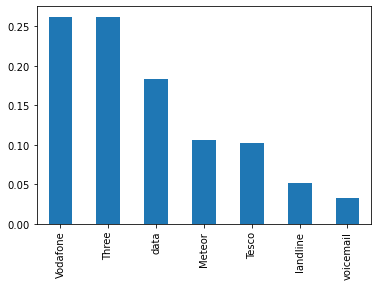

In [192]:
dfmobnetwork.network.value_counts(normalize= True).plot.bar()
plt.show()

<AxesSubplot:>

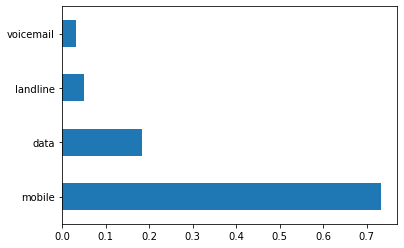

In [193]:
dfmobnetwork.network_type.value_counts(normalize= True).plot.barh()

#### a ) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.

In [194]:
st.shapiro(dfmobnetwork['duration'])

ShapiroResult(statistic=0.9984679818153381, pvalue=0.701244592666626)

In [198]:
mu = np.mean(dfmobnetwork['duration'])
sigma = np.std(dfmobnetwork['duration'])
print(" Confidence Interval at 95% level of significance :",st.norm.interval(0.95,mu,sigma))
print(" Confidence Interval at 99% level of significance :",st.norm.interval(0.99,mu,sigma))

 Confidence Interval at 95% level of significance : (54.81315656633359, 233.79671455333732)
 Confidence Interval at 99% level of significance : (26.692801573465673, 261.91706954620525)


#### b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

In [208]:
dfmobnetwork['network'].value_counts()

Vodafone     215
Three        215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

In [200]:
100/7

14.285714285714286

In [209]:
observed_values = scipy.array([215,215,150,87,84,42,27])
n = observed_values.sum()
expected_values = scipy.array([n*0.143,n*0.143,n*0.143,n*0.143,n*0.143,n*0.143,n*0.143])

chi_square_stat,pvalue = st.chisquare(observed_values,f_exp = expected_values)

pvalue

2.4573340336366267e-63

In [210]:
pvalue < 0.05

True

#### c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.

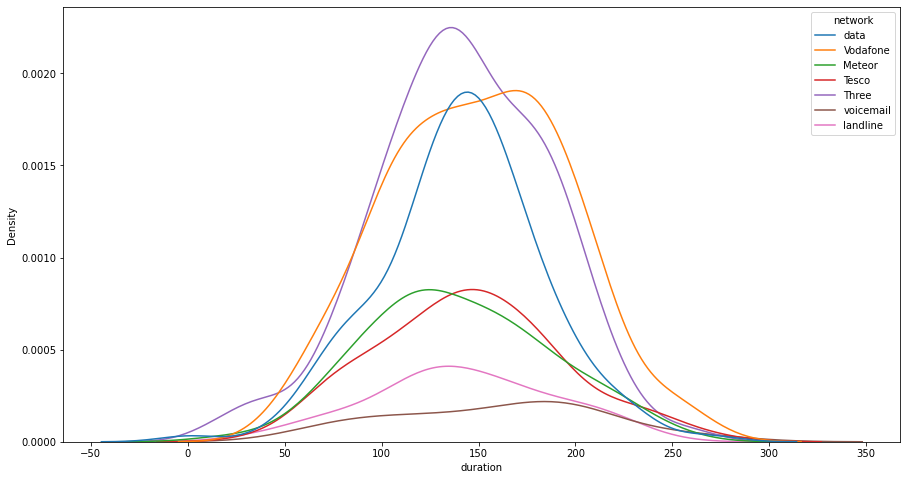

In [212]:
plt.figure(figsize= (15,8))
sns.kdeplot(x = dfmobnetwork['duration'],hue = dfmobnetwork['network']);

#### d)Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.


In [213]:
dfmobnetwork.head()

,duration,item,network,network_type,Date,Time,Year,Month
0,221.321120,data,data,data,15-10-14,6:58,2014,11
1,81.610599,call,Vodafone,mobile,15-10-14,6:58,2014,11
2,143.109111,call,Meteor,mobile,15-10-14,14:46,2014,11
3,111.888670,call,Tesco,mobile,15-10-14,14:48,2014,11
4,246.695171,call,Tesco,mobile,15-10-14,17:27,2014,11


In [224]:
df_dummies = pd.get_dummies(dfmobnetwork['item'])
df_dummies

,call,data,sms
0,0,1,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
815,0,1,0
816,0,1,0
817,0,1,0
818,0,0,1


In [227]:
df_new = pd.concat([dfmobnetwork,df_dummies],axis = 1)
del(df_new['item'])
df_new.head()

,duration,network,network_type,Date,Time,Year,Month,call,data,sms
0,221.321120,data,data,15-10-14,6:58,2014,11,0,1,0
1,81.610599,Vodafone,mobile,15-10-14,6:58,2014,11,1,0,0
2,143.109111,Meteor,mobile,15-10-14,14:46,2014,11,1,0,0
3,111.888670,Tesco,mobile,15-10-14,14:48,2014,11,1,0,0
4,246.695171,Tesco,mobile,15-10-14,17:27,2014,11,1,0,0


In [230]:
df1 = df_new[['duration','call','data','sms']].copy()
df1

,duration,call,data,sms
0,221.321120,0,1,0
1,81.610599,1,0,0
2,143.109111,1,0,0
3,111.888670,1,0,0
4,246.695171,1,0,0
...,...,...,...,...
815,185.328156,0,1,0
816,89.819383,0,1,0
817,117.604998,0,1,0
818,77.834006,0,0,1


In [231]:
df1.corr()

,duration,call,data,sms
duration,1.000000,0.068462,-0.034573,-0.043821
call,0.068462,1.000000,-0.448417,-0.686132
data,-0.034573,-0.448417,1.000000,-0.342564
sms,-0.043821,-0.686132,-0.342564,1.000000


In [232]:
tab = pd.crosstab(dfmobnetwork['item'],dfmobnetwork['duration'])
tab

duration,0.993514,14.173899,15.927469,21.456720,32.116432,32.957849,36.796316,38.178570,38.190416,42.386148,...,250.015752,250.865661,252.947691,255.202191,260.813244,264.422909,264.850816,268.343460,268.443922,268.458090
item,,,,,,,,,,,,,,,,,,,,,
call,0,0,1,1,1,0,1,1,0,1,...,1,0,1,1,1,1,0,0,1,0
data,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
sms,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0


In [233]:
observed_values = tab.values
observed_values

array([[0, 0, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 1, 0, 0]], dtype=int64)

In [235]:
stats,pval,dof,expected_values = st.chi2_contingency(observed= observed_values,correction= False)

In [236]:
dof

1638

In [239]:
critical_value = np.abs(round(st.chi2.isf(q = 0.05,df = dof - 1),5))
critical_value

1732.23992

In [243]:
stats

1640.0

In [241]:
pval > 0.05

True

In [245]:
stats > critical_value

False

#### e) Perform statistical tests to identify the relation between network and network_type. 

In [214]:
tab = pd.crosstab(dfmobnetwork['network'],dfmobnetwork['network_type'])
tab

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,87,0
Tesco,0,0,84,0
Three,0,0,215,0
Vodafone,0,0,215,0
data,150,0,0,0
landline,0,42,0,0
voicemail,0,0,0,27


In [215]:
observed_values = tab.values
observed_values

array([[  0,   0,  87,   0],
       [  0,   0,  84,   0],
       [  0,   0, 215,   0],
       [  0,   0, 215,   0],
       [150,   0,   0,   0],
       [  0,  42,   0,   0],
       [  0,   0,   0,  27]], dtype=int64)

In [221]:
stat,pval,dof,expected_values = st.chi2_contingency(observed=observed_values,correction= False)

In [222]:
pval

0.0

In [223]:
pval > 0.05

False